In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import linregress
import matplotlib.mlab as mlab
import scipy

In [2]:
def import_particle_test(filename, plot=False, delimiter=','):
    data = np.loadtxt(filename, unpack=True, delimiter=delimiter, skiprows=2)[1:]
    data[-1] = data[-1] - data[-1, 0]
    data[0] = data[0] * 1e-6
    data[1] = data[1] * 1e-6
    data_r2 = (data[0]**2 + data[1]**2) - (data[0][0]**2 + data[1][0]**2)
    if plot:
        plt.plot(data[0], data_r2)
    return data, data_r2

In [3]:
def import_particle(filename, plot=False, delimiter=','):
    data = np.loadtxt(filename, unpack=True, delimiter=delimiter, skiprows=2)[1:]
    data[-1] = data[-1] - data[-1, 0]
    data[0] = data[0] * 1e-6
    data[1] = data[1] * 1e-6
    data_r2 = (data[0] - data[0, 0])**2 + (data[1] - data[1, 0])**2
    if plot:
        plt.plot(data[0], data_r2)
    return data, data_r2

In [4]:
test_data, test_r2 = import_particle_test('data1_par2.txt')
data1_par2, data1_par2_r2 = import_particle('data1_par2.txt')

In [5]:
# when taking an average, the arrays need to be of the same length
# this function gets around that by taking the average of all available elements for each index

def averaging_function(arrays):
    
    # finding the longest array
    longest_par = arrays[0]
    for i in arrays:
        if len(i) > len(longest_par):
            longest_par = i
    
    # creating an empty array to store the average
    averaged_r2 = np.zeros(len(longest_par))

    # loop that runs over each index, each array (in that nesting order) to find mean
    for i in range(len(longest_par)):
        temp = []
        for j in arrays:
            if i < len(j):
                temp.append(j[i])
        averaged_r2[i] = np.mean(temp)
        
    return (averaged_r2)

In [6]:
# when taking an average, the arrays need to be of the same length
# this function gets around that by taking the average of all available elements for each index

def std_function(arrays):
    
    # finding the longest array
    longest_par = arrays[0]
    for i in arrays:
        if len(i) > len(longest_par):
            longest_par = i
    
    # creating an empty array to store the average
    std_r2 = np.zeros(len(longest_par))

    # loop that runs over each index, each array (in that nesting order) to find mean
    for i in range(len(longest_par)):
        temp = []
        for j in arrays:
            if i < len(j):
                temp.append(j[i])
        std_r2[i] = np.std(temp)
        
    return (std_r2)

In [7]:
def import_folder(filename, start_index, end_index, delimiter=','):
    datas = []
    data_r2s = []
    for i in range(start_index, end_index + 1):
        temp_data, temp_r2 = import_particle(f'{filename}{i}.txt', delimiter=delimiter)
        datas.append(temp_data)
        data_r2s.append(temp_r2)
        print(i)
    return datas, data_r2s

In [8]:
v5_data, v5_r2 = import_folder('data_5/v5p', 2, 5)

2
3
4
5


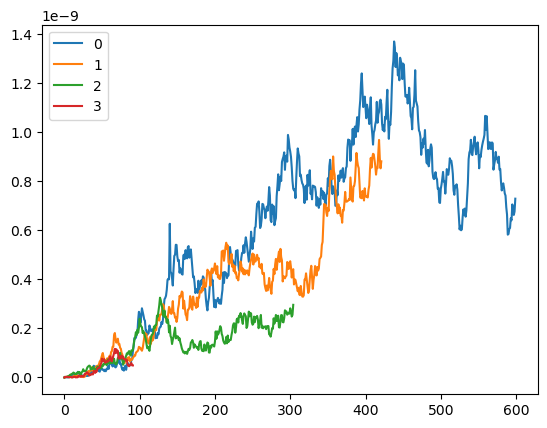

In [9]:
for i, t in enumerate(v5_r2):
    plt.plot(np.arange(len(t)), t, label=f'{i}')
plt.legend()

In [10]:
v1_data, v1_r2 = import_folder('data1_par', 2, 6)

2
3
4
5
6


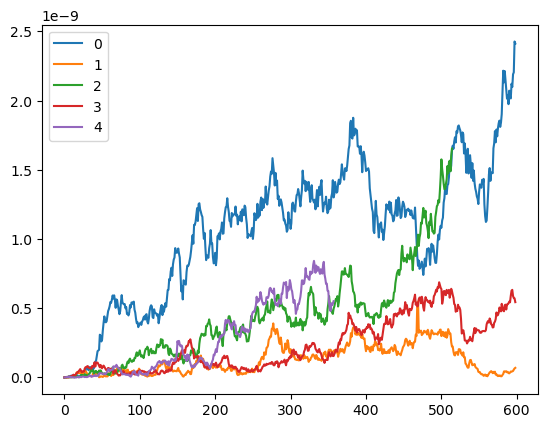

In [11]:
for i, t in enumerate(v1_r2):
    plt.plot(np.arange(len(t)), t, label=f'{i}')
plt.legend()

In [12]:
v5_r2_mean = averaging_function(v5_r2)

In [13]:
v4_data, v4_r2 = import_folder('data_4/vid4_p', 2, 8, delimiter='\t')

2
3
4
5
6
7
8


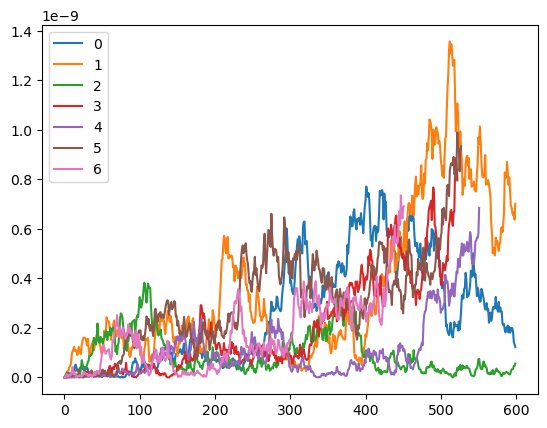

In [14]:
for i, t in enumerate(v4_r2):
    plt.plot(np.arange(len(t)), t, label=f'{i}')
plt.legend()

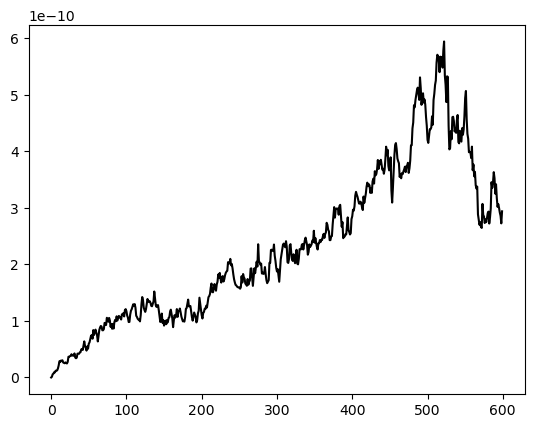

In [15]:
v4_r2_mean = averaging_function(v4_r2)
# for i in range(1, 12):
    # plt.plot(v4_data[i][-1], v4_r2[i])
plt.plot(v4_data[0][-1][:600], v4_r2_mean, color='k')

In [16]:
data_so_far = v4_r2 + v5_r2 + v1_r2

Text(0, 0.5, 'Average r$^2$ values ($ m$) (600 Frames)')

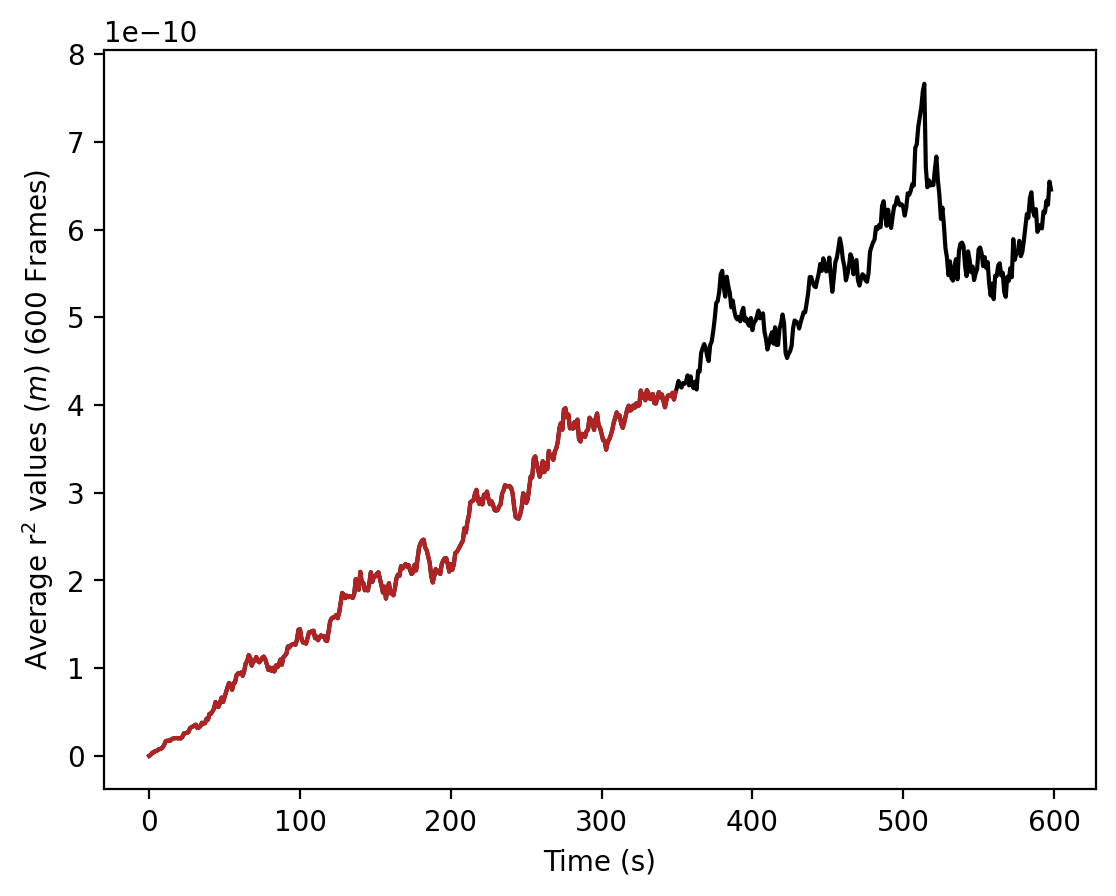

In [17]:
# for i, t in enumerate(data_so_far):
#     plt.plot(np.arange(len(t)), t, alpha=0.5)
plt.figure(dpi=200)
plt.plot(np.arange(0, 599), averaging_function(data_so_far)[:-1], color='k')
plt.plot(np.arange(0, 350), averaging_function(data_so_far)[:350], color='firebrick')
plt.xlabel('Time (s)')
plt.ylabel('Average r$^2$ values ($ m$) (600 Frames)')

Text(0.5, 1.0, 'MSD vs Time for 16 particles (all particles shown)')

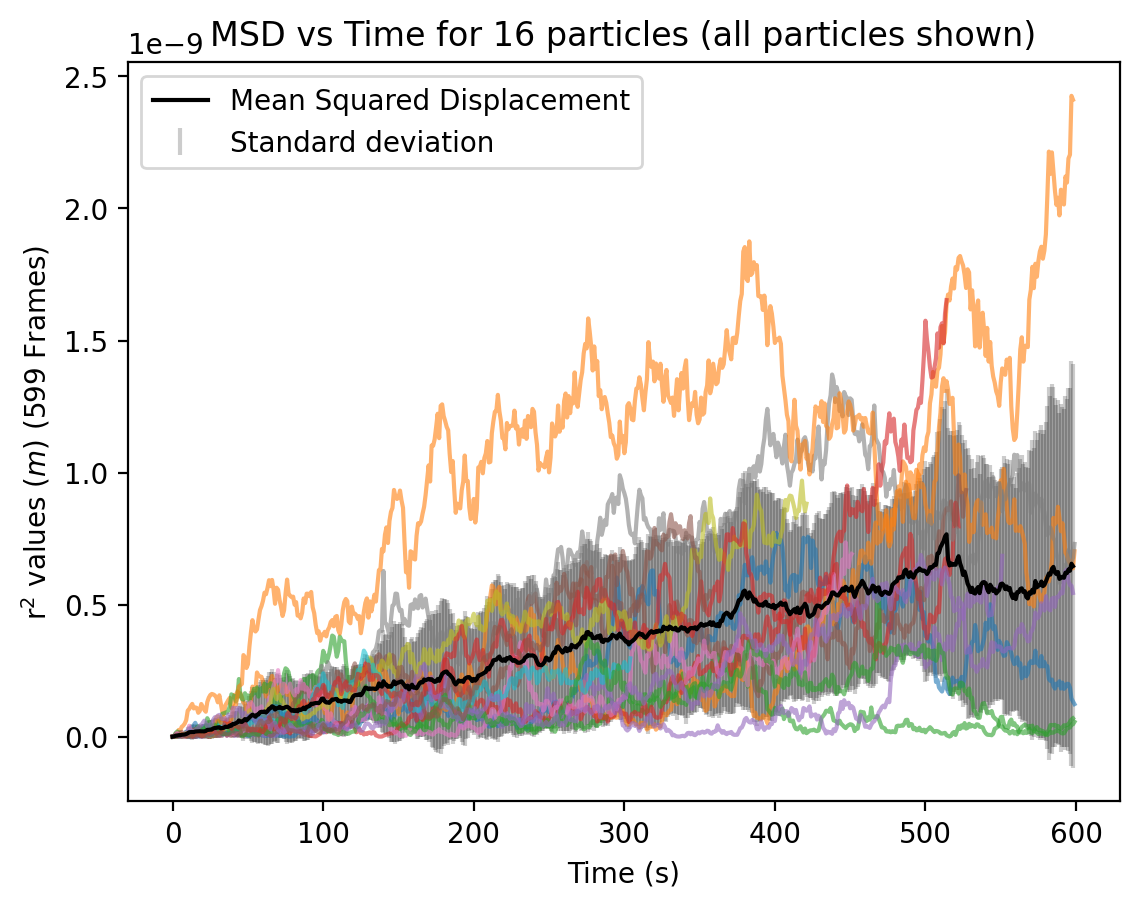

In [80]:
part_a_err = std_function(data_so_far)
plt.figure(dpi=200)
for i, t in enumerate(data_so_far):
        plt.plot(np.arange(len(t)), t, alpha=0.6)
#plt.plot(np.arange(0, 599), averaging_function(data_so_far)[:-1], color='k')
plt.plot(np.arange(0, 599), averaging_function(data_so_far)[:599], color='k', label='Mean Squared Displacement')
plt.xlabel('Time (s)')
plt.ylabel(r'r$^2$ values ($m$) (599 Frames)')
slope_final, intercept_final = np.polyfit(np.arange(0, 599), averaging_function(data_so_far)[:599], deg=1)
# plt.plot(np.arange(0,599), np.arange(0,599)*slope_final+intercept_final, ls='--', alpha=1, linewidth=2.1, label='Best Fit', zorder=0)
plt.errorbar(np.arange(0, 599), averaging_function(data_so_far)[:599], yerr=part_a_err[:599], ls='none', zorder = 0, alpha=0.2, label='Standard deviation', color='k')
plt.legend()
# plt.text(0, 1e-9, f'Slope = {np.round(slope_final * 1e12, decimals=3)}' + r' X $10^{-12}$ ms$^{-1}$', color='k', 
#         bbox=dict(facecolor=(0.9, 0.6, 0.6), edgecolor='k'))
# plt.text(0, 8e-10, f'Intercept = {np.round(intercept_final * 1e12, decimals=3)}' + r' X $10^{-12}$ m', color='k', 
#         bbox=dict(facecolor=(0.9, 0.6, 0.6), edgecolor='k'))
plt.title(
    'MSD vs Time for 16 particles (all particles shown)'
)

In [63]:
_, _, r_value, p_value, std_err = linregress(np.arange(0, 599), averaging_function(data_so_far)[:599])
print(std_err)

9.529175396591944e-15


In [64]:
print(((9.529175396591944e-15/1.095509969022373e-12)**2 + (0.1/295)**2)**(1/2))

0.008704994934113955


In [20]:
slope_final, intercept_final = np.polyfit(np.arange(0, 600), averaging_function(data_so_far)[:600], deg=1)
print(slope_final, intercept_final)

1.095509969022373e-12 2.9690368803733515e-11


In [21]:
viscosity_x = np.array([0, 10, 20, 30, 40])
viscosity_y = np.array([1793, 1307, 1002, 797.7, 653.2]) * 1e-6
visc = np.interp(22.8, xp=viscosity_x, fp=viscosity_y)
print(visc * 1e4)
r = 1e-6

k = (slope_final * 6 * np.pi * visc * r )/ (295 * 4)
print(k)

9.447959999999998
1.6533831055590683e-23


## Part B

In [22]:
v1_p5_data, v1_p5_r2 = import_particle('data1_par5.txt')

In [23]:
def time_ensemble(data, no_of_frames):
    R = no_of_frames%10
    data_bins = []
    for i in range((no_of_frames - R)/10):
            data_bins.append([data[0][i*10 : i*10 + 10], data[1][i*10 : i*10 + 10]])
    data_bins.append([data[0][-R: ], data[1][-R:]])
    for i in range(60):
            data_bins[i][0] = data_bins[i][0] - data_bins[i][0][0]
            data_bins[i][1] = data_bins[i][1] - data_bins[i][1][0]

    

In [24]:
v1_p5_bins = []
for i in range(59):
        v1_p5_bins.append([v1_p5_data[0][i*10 : i*10 + 10], v1_p5_data[1][i*10 : i*10 + 10]])
v1_p5_bins.append([v1_p5_data[0][590 : ], v1_p5_data[1][590:]])
for i in range(60):
        v1_p5_bins[i][0] = v1_p5_bins[i][0] - v1_p5_bins[i][0][0]
        v1_p5_bins[i][1] = v1_p5_bins[i][1] - v1_p5_bins[i][1][0]

In [25]:
v1_p5_r2_bins = []
for i in range(60):
    r2 = v1_p5_bins[i][0] ** 2 + v1_p5_bins[i][1] ** 2
    v1_p5_r2_bins.append(r2)

In [26]:
test_list = []
for i in v1_p5_r2_bins:
    test_list.append(i[5])
# print(test_list)
print(np.std(test_list))

4.307124385482809e-12


In [27]:
v1_p5_r2_std = std_function(v1_p5_r2_bins)

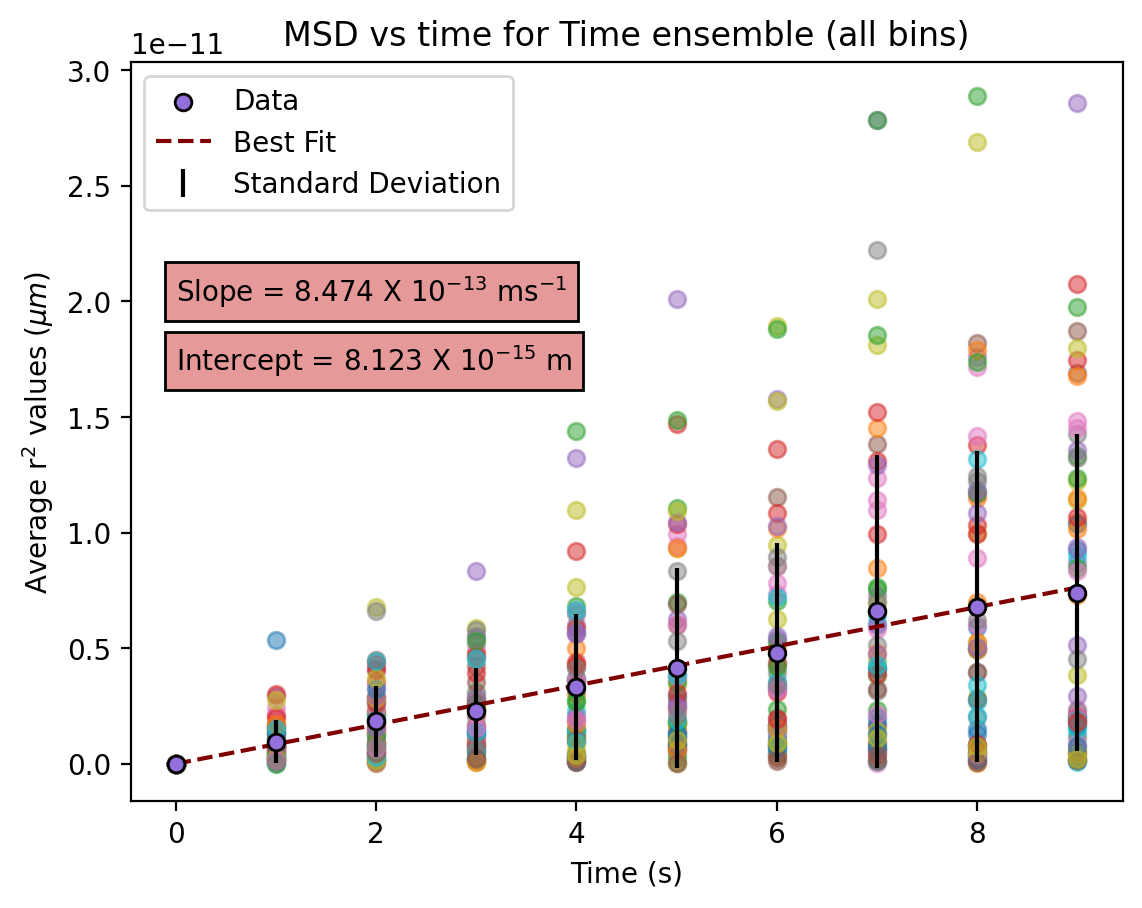

In [76]:
plt.figure(dpi=200)
for i in v1_p5_r2_bins:
    plt.scatter(np.arange(len(i)), i, alpha=0.5, zorder=0)
v1_p5_r2_avg = averaging_function(v1_p5_r2_bins)
plt.scatter(np.arange(0, 10), v1_p5_r2_avg, color='mediumpurple', edgecolors='k', label='Data', zorder = 2)
v1_p5_b_slope, v1_p5_b_intercept = np.polyfit(np.arange(10), v1_p5_r2_avg, deg=1)
plt.plot(np.arange(0, 10), np.arange(0, 10) * v1_p5_b_slope + v1_p5_b_intercept, ls='--', color = 'maroon', label='Best Fit', zorder = 1)
plt.errorbar(np.arange(0, 10), v1_p5_r2_avg, yerr=v1_p5_r2_std, ls='none', color='k', label='Standard Deviation', zorder = 0)
plt.xlabel('Time (s)')
plt.ylabel(r'Average r$^2$ values ($\mu m$)')
plt.text(0, 20e-12, f'Slope = {np.round(v1_p5_b_slope * 1e13, decimals=3)}' + r' X $10^{-13}$ ms$^{-1}$', color='k', 
        bbox=dict(facecolor=(0.9, 0.6, 0.6), edgecolor='k'))
plt.text(0, 17e-12, f'Intercept = {np.round(v1_p5_b_intercept * 1e15, decimals=3)}' + r' X $10^{-15}$ m', color='k', 
        bbox=dict(facecolor=(0.9, 0.6, 0.6), edgecolor='k'))
plt.title('MSD vs time for Time ensemble (all bins)')
plt.legend()


In [29]:
_, _, _, _, std_error = linregress(np.arange(10), v1_p5_r2_avg)
print(std_error)

3.252772364419174e-14


In [65]:
((3.252772364419174e-14 / v1_p5_b_slope) **2 + (0.1/295)**2)**(1/2)


np.float64(0.038387333449457245)

In [30]:
viscosity_x = np.array([0, 10, 20, 30, 40])
viscosity_y = np.array([1793, 1307, 1002, 797.7, 653.2]) * 1e-6
visc = np.interp(22, xp=viscosity_x, fp=viscosity_y)
r = 1e-6

v1_p5_k = (v1_p5_b_slope * 6 * np.pi * visc * r )/ (295 * 4)
print(v1_p5_k)

1.3010333451800313e-23


In [31]:
def import_d_particle(filename, plot=False, delimiter='\t'):
    data = np.loadtxt(filename, unpack=True, delimiter=delimiter, skiprows=2)
    data[-1] = data[-1] - data[-1, 0]
    data[0] = data[0] * 1e-6
    data[1] = data[1] * 1e-6

    data_r2 = (data[0] - data[0, 0])**2 + (data[1] - data[1, 0])**2
    if plot:
        plt.plot(data[0], data_r2)
    print(filename)
    return data, data_r2

## Step sizes

In [32]:
def step_size_from_data(data):
    x = data[0]
    y = data[1]
    step_size = []
    for i in range(len(data[0]) - 1):
        ini_pos = (x[i]**2 + y[i]**2)**(1/2)
        fin_pos = (x[i+1]**2 + y[i+1]**2)**(1/2)
        step_size.append(fin_pos - ini_pos)        
    return step_size

In [33]:
good_data = v1_data + v5_data + v4_data
print(len(v4_data))
all_steps = []
for i in good_data:
    all_steps = all_steps + step_size_from_data(i)

7


7928


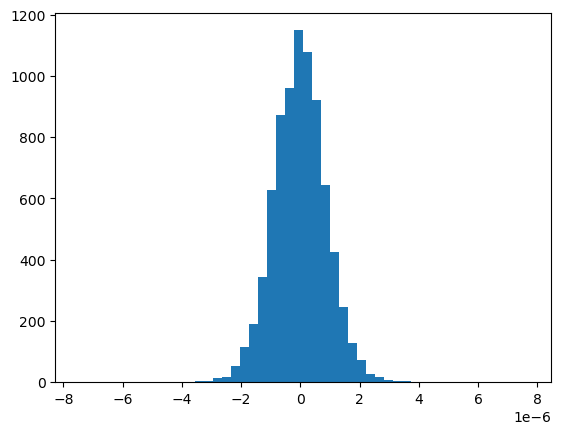

In [62]:
plt.hist(all_steps, bins=50);
print(len(all_steps))

#### Gaussian

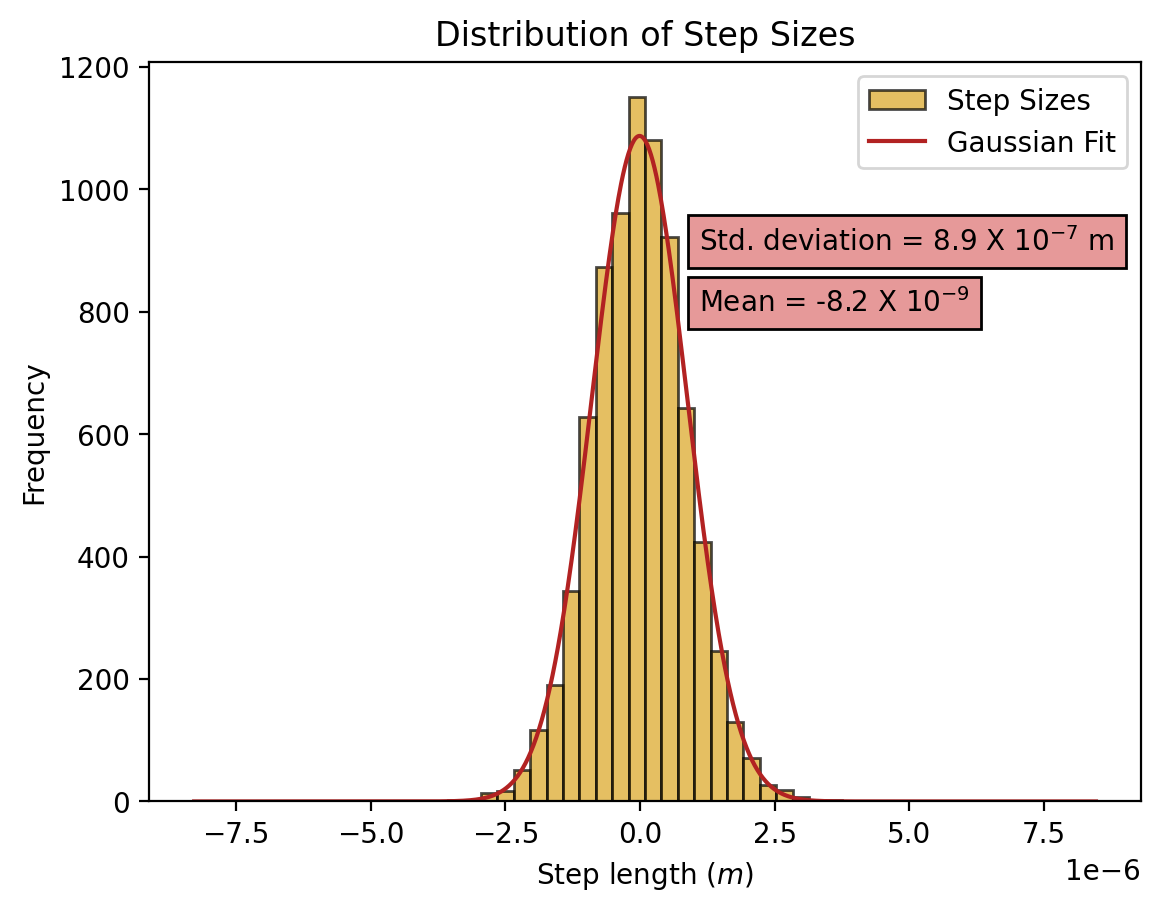

-8.203403224775641e-09
8.857447897059114e-07


In [61]:
plt.figure(dpi=200)
count, bins, _ = plt.hist(all_steps, bins=50, edgecolor='k', color='goldenrod', alpha=0.7, label='Step Sizes');
mean, sigma = norm.fit(all_steps)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, mean, sigma)* (bins[1] - bins[0]) * len(all_steps)
plt.plot(x,p, label='Gaussian Fit', color='firebrick')
plt.xlabel('Step length ($m$)')
plt.ylabel('Frequency')
plt.text(1.1*1e-6, 800, f'Mean = {np.round(mean*1e9, decimals=1)}' + r' X $10^{-9}$', color='k', 
        bbox=dict(facecolor=(0.9, 0.6, 0.6), edgecolor='k'))
plt.text(1.1*1e-6, 900, f'Std. deviation = {np.round(sigma*1e7, decimals=1)}' + r' X $10^{-7}$ m', color='k', 
        bbox=dict(facecolor=(0.9, 0.6, 0.6), edgecolor='k'))
plt.title('Distribution of Step Sizes')
plt.legend()
plt.show()
print(mean)
print(sigma)

In [36]:
D = (sigma**2)/4
print('Diffusion Coef Part D = ', D)

Diffusion Coef Part D =  1.9613595812279231e-13


In [37]:
def gaussian(x, A, mu, sigma):
    return A * np.exp(-((x - mu)*2) / (2 * sigma*2))

# Perform curve fitting
popt, pcov = scipy.optimize.curve_fit(gaussian, count, bins)

# popt contains the optimized parameters: A, mu, sigma
# pcov is the covariance matrix

sigma_fit = popt[2]  # The best-fit sigma value
sigma_error = np.sqrt(pcov[2, 2])

ValueError: operands could not be broadcast together with shapes (50,) (51,) 

In [76]:
r = 1e-6
k = (D * 6 * np.pi * visc * r)/295
print('Boltzman Constant Part D=', k)

Boltzman Constant Part D= 1.2045448639783497e-23
